# Lecture 2. Autocontrast.
## Linear autocontrast.

In [1]:
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Vasily/.virtualenvs/timi/lib/python3.6/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


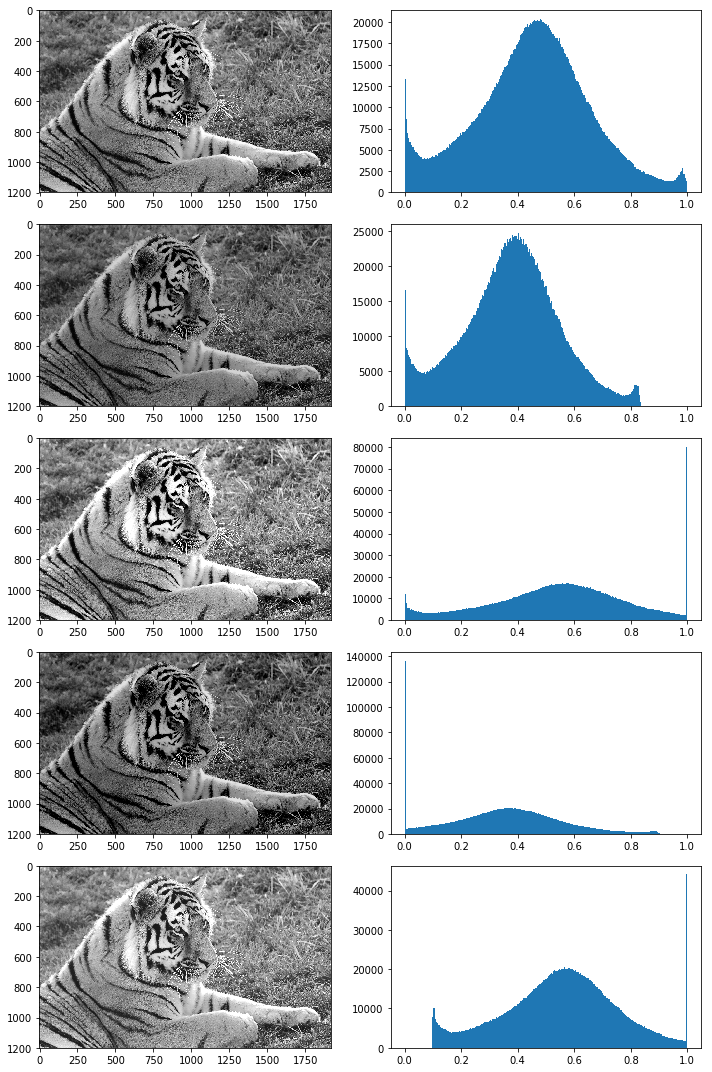

In [2]:
img = imread('https://www.1zoom.ru/big2/439/312207-Lastochka.jpg', as_grey=True)
plt.figure(figsize=(10,15))
plt.subplot(5,2,1)
imshow(img)
plt.subplot(5,2,2)
plt.hist(img.ravel(), bins = 255, range=[0, 1]);
plt.subplot(5,2,3)
imshow(img / 1.2)
plt.subplot(5,2,4)
plt.hist((img / 1.2).ravel(), bins = 255, range=[0, 1]);
plt.subplot(5,2,5)
imshow(np.clip(img * 1.2, 0, 1))
plt.subplot(5,2,6)
plt.hist(np.clip(img * 1.2, 0, 1).ravel(), bins = 255, range=[0, 1]);
plt.subplot(5,2,7)
imshow(np.clip(img - 0.1, 0, 1))
plt.subplot(5,2,8)
plt.hist(np.clip(img - 0.1, 0, 1).ravel(), bins = 255, range=[0, 1]);
plt.subplot(5,2,9)
imshow(np.clip(img + 0.1, 0, 1))
plt.subplot(5,2,10)
plt.hist(np.clip(img + 0.1, 0, 1).ravel(), bins = 255, range=[0, 1]);

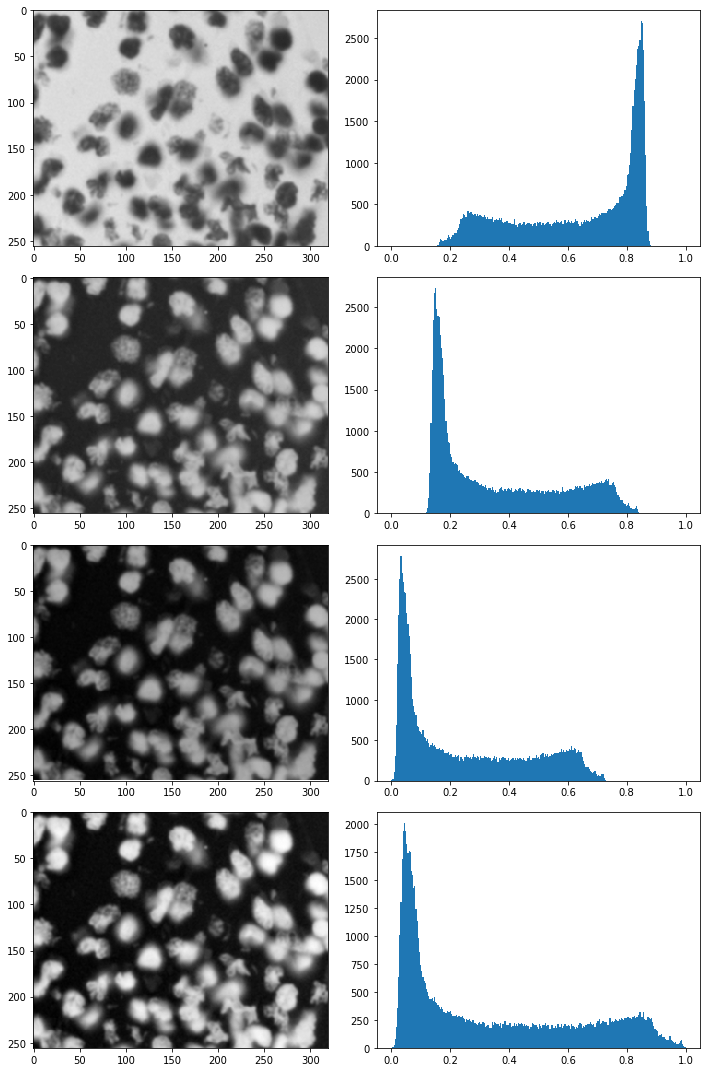

In [3]:
img = imread('nuclear.png', as_grey=True)

plt.figure(figsize=(10,15))
plt.subplot(421)
imshow(img)
plt.subplot(422)
plt.hist(img.ravel(), bins = 255, range=[0, 1]);
plt.subplot(423)
inv_img = 1 - img
imshow(inv_img)
plt.subplot(424)
plt.hist(inv_img.ravel(), bins = 255, range=[0, 1]);
plt.subplot(425)
imshow(inv_img - inv_img.min())
plt.subplot(426)
plt.hist((inv_img - inv_img.min()).ravel(), bins = 255, range=[0, 1]);
plt.subplot(427)
imshow((inv_img - inv_img.min()) / (inv_img.max() - inv_img.min()))
plt.subplot(428)
plt.hist(((inv_img - inv_img.min()) / (inv_img.max() - inv_img.min())).ravel(), bins = 255, range=[0, 1]);

## Autocontrast of RGB image

Algorithm for autocontrast $RGB$ image:
- convert image into $YUV$ color scheme;
- apply linear autocontrast for channel $Y$;
- convert again into $RGB$ color scheme. 

$Y$ - the brithness, $U$ and $V$ - additional color components.

Convertation $RGB$ to $YUV$:
- $Y = 0.2126 \times R + 0.7152 \times G + 0.0722 \times B$
- $U = -0.0999 \times R - 0.3360 \times G + 0.4360 \times B$
- $V = 0.6150 \times R - 0.5586 \times G - 0.0563 \times B$

in skimage.color.rgb2yuv

Convertation $YUV$ to $RGB$:
- $R = Y + 1.2803 \times V$
- $G = Y - 0.2148 \times U - 0.3805 \times V$
- $B = Y + 2.1279 \times U$

in skimage.color.yuv2rgb

https://en.wikipedia.org/wiki/YUV

## Color correction (grayscale world)

Photographers make test photos of color cards. They know real color of each card. Using them they can correct colors on images.

$R = \frac{R}{r_w}$ 
$G = \frac{G}{g_w}$ 
$B = \frac{B}{b_w}$

But in our images we do not have such cards. But there is another way for color correction which is called grayscale world.

$Avr = \frac{\overline R + \overline G + \overline B}{3}$

$r_w = \frac{R}{Avr}$ 
$g_w = \frac{G}{Avr}$ 
$b_w = \frac{B}{Avr}$

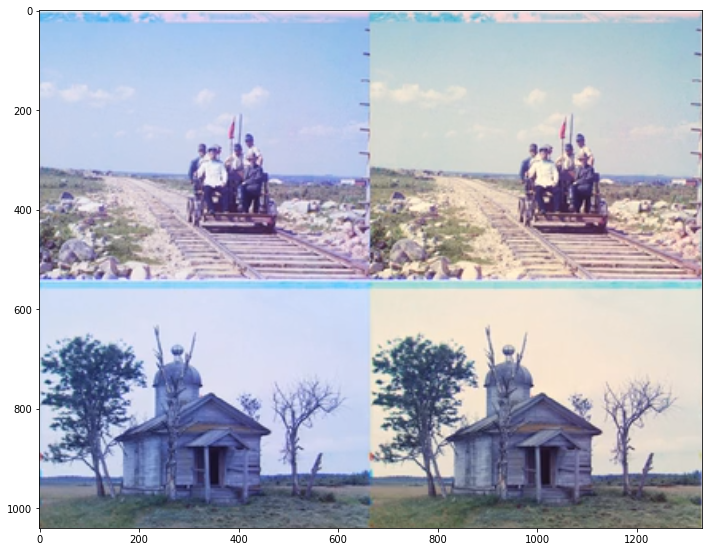

In [8]:
plt.figure(figsize=(10,10))
imshow(imread('color_correction.png'))

## Enhanced autocontrast or histogram equalization

Algorithm:
1. calculate the historgam of the image;
2. calculate $cdf$ using the histogram from the previous step;
3. update the value of pixel using formula:

$f(x) = \frac{cdf(x) - cdf_{min}}{N - 1}$

where $cdf(x)$ - cumulative distribution function, $cdf_{min}$ - the minimum value of $cdf(x)$ but not equal 0, $N$ - the number of pixels.

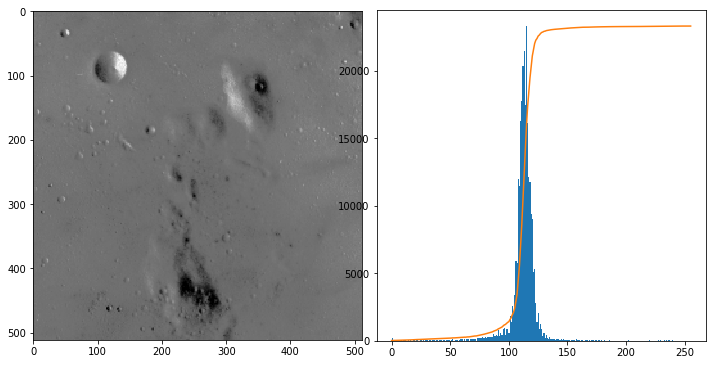

In [22]:
from skimage.data import moon
img = moon()
plt.figure(figsize = (10, 5))
plt.subplot(121)
imshow(img)
plt.subplot(122)
h = plt.hist(img.ravel(), bins = 256, range=(0,255))[0];
cdf = np.cumsum(h)
plt.plot(range(len(h)), cdf / cdf.max() * h.max());

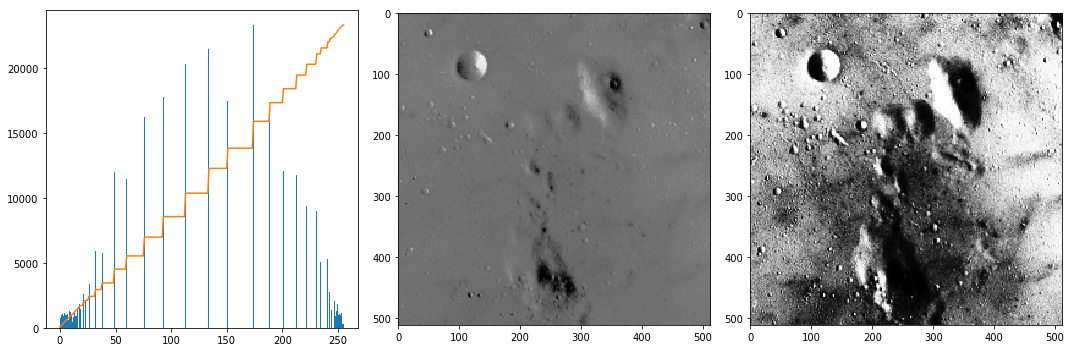